In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df = pd.read_csv('elec_data_2012-2017')

In [4]:
df

,Date,Heures,Consommation,Fuel,Coal,Gas,Nuclear,Wind,Solar,Hydraulic,Pumping,Bioenergies
0,2012-01-01,00:00,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0
1,2012-01-01,00:30,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0
2,2012-01-01,01:00,56231.0,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,-1730.0,721.0
3,2012-01-01,01:30,56075.0,491.0,25.0,3832.0,51950.0,3526.0,0.0,7299.0,-2134.0,722.0
4,2012-01-01,02:00,55532.0,492.0,25.0,3839.0,51625.0,3535.0,0.0,7159.0,-2449.0,719.0
...,...,...,...,...,...,...,...,...,...,...,...,...
157826,2020-12-31,21:30,64423.0,94.0,8.0,5712.0,50680.0,1319.0,0.0,7755.0,-228.0,1120.0
157827,2020-12-31,22:00,63505.0,93.0,8.0,5583.0,50726.0,1246.0,0.0,7146.0,-230.0,1117.0
157828,2020-12-31,22:30,64331.0,93.0,8.0,5573.0,50719.0,1210.0,0.0,7136.0,-175.0,1121.0
157829,2020-12-31,23:00,66853.0,94.0,8.0,5731.0,50679.0,1129.0,0.0,8148.0,-175.0,1124.0


In [5]:
df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Heures'], format='%Y-%m-%d %H:%M:%S')

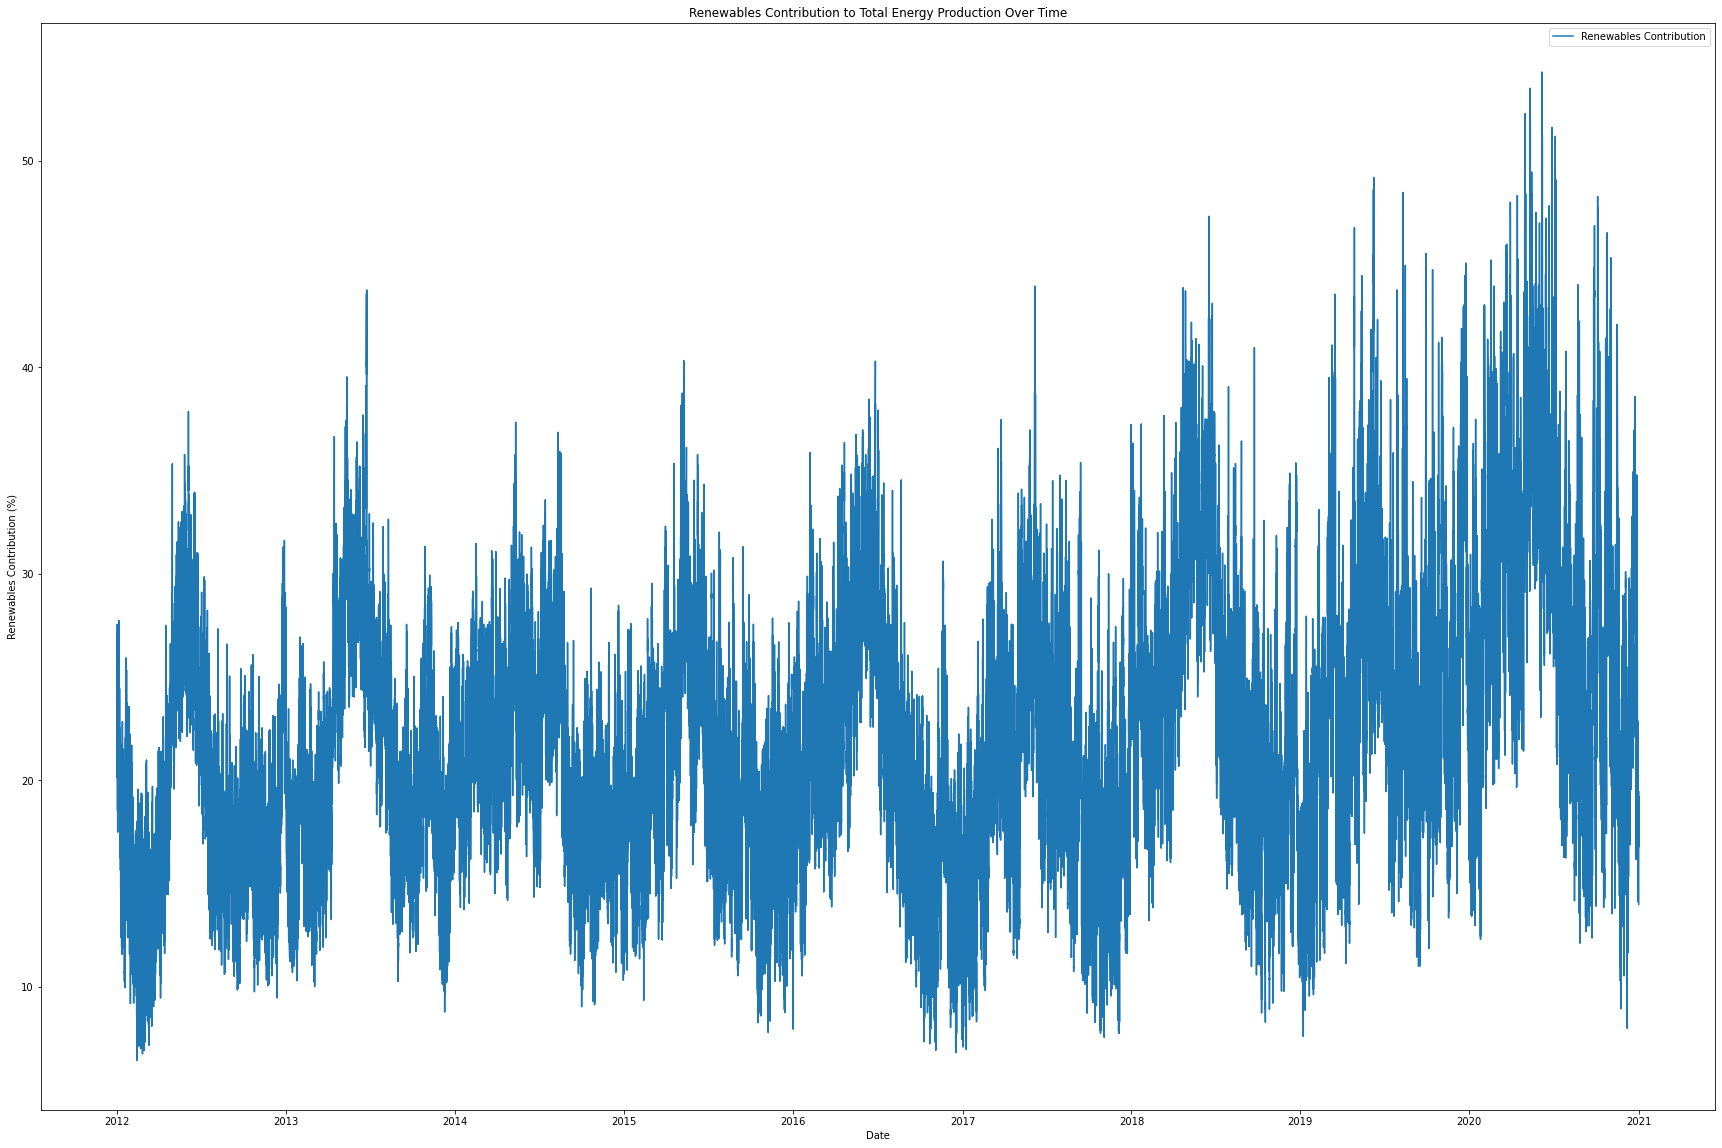

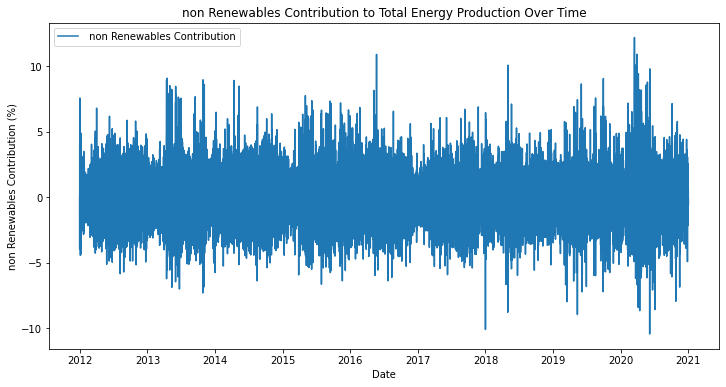

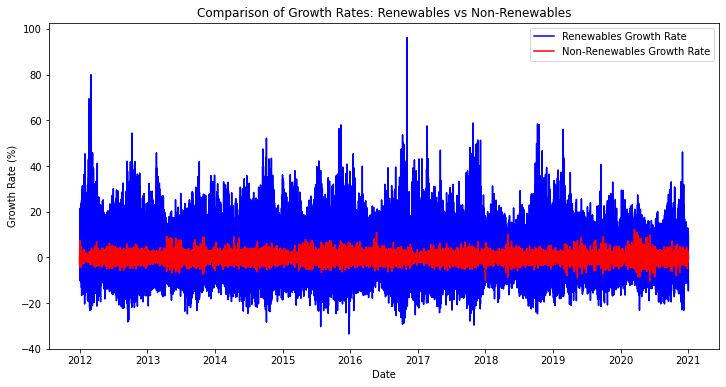

In [6]:

## diff renewable and non renewable 
renewables_cols = ['Wind', 'Solar', 'Hydraulic', 'Bioenergies']
non_renewables_cols = ['Coal', 'Gas', 'Nuclear']

df['Total_Renewables'] = df[renewables_cols].sum(axis=1)
df['Total_Non_Renewables'] = df[non_renewables_cols].sum(axis=1)

df['Renewables_Contribution'] = (df['Total_Renewables'] / df['Consommation']) * 100
df['Non-Renewables_Contribution'] = (df['Total_Non_Renewables'] / df['Consommation']) * 100

# Calculate the growth rates for renewables and non-renewables
df['Renewables_Growth_Rate'] = df['Total_Renewables'].pct_change() * 100
df['Non_Renewables_Growth_Rate'] = df['Total_Non_Renewables'].pct_change() * 100

# Plotting the contribution of renewables over time
plt.figure(figsize=(30, 20))

# Line plot for the percentage contribution of renewables
sns.lineplot(x='Date', y='Renewables_Contribution', data=df, label='Renewables Contribution')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Renewables Contribution (%)')
plt.title('Renewables Contribution to Total Energy Production Over Time')
plt.legend()
plt.show()

# Plotting the contribution of non renewables over time
plt.figure(figsize=(12, 6))

# Line plot for the percentage contribution of renewables
sns.lineplot(x='Date', y='Non_Renewables_Growth_Rate', data=df, label=' non Renewables Contribution')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('non Renewables Contribution (%)')
plt.title('non Renewables Contribution to Total Energy Production Over Time')
plt.legend()
plt.show()

# Plotting the growth rates of renewables and non-renewables
plt.figure(figsize=(12, 6))

# Line plot for the growth rates
sns.lineplot(x='Date', y='Renewables_Growth_Rate', data=df, label='Renewables Growth Rate', color='blue')
sns.lineplot(x='Date', y='Non_Renewables_Growth_Rate', data=df, label='Non-Renewables Growth Rate', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.title('Comparison of Growth Rates: Renewables vs Non-Renewables')
plt.legend()
plt.show()


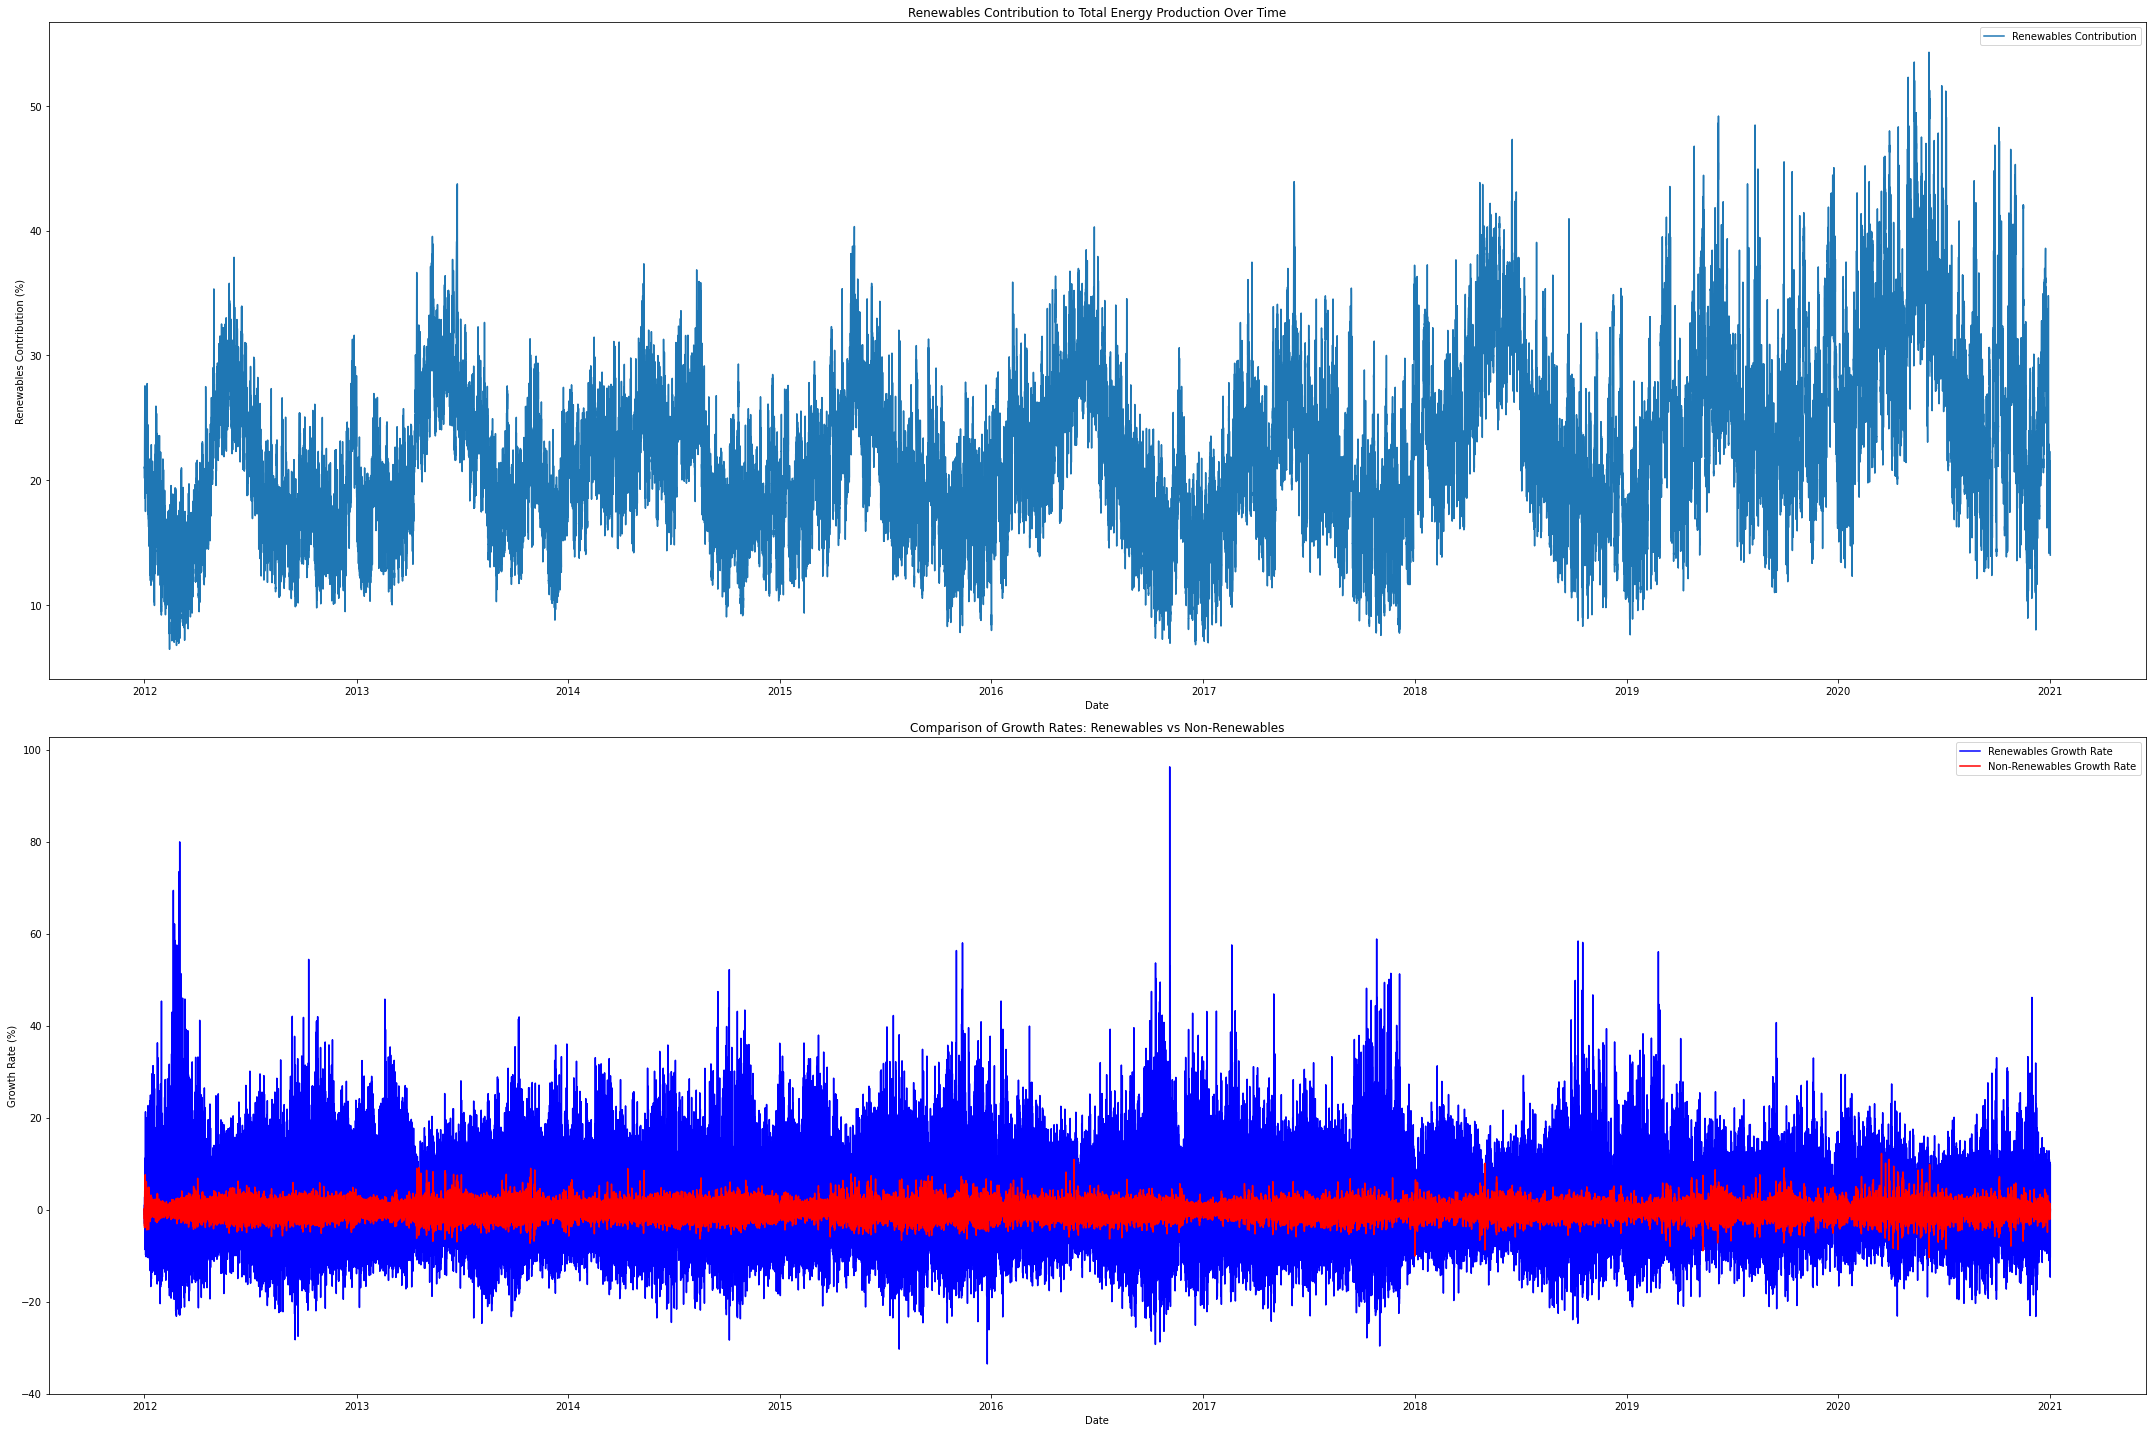

In [7]:
renewables_cols = ['Wind', 'Solar', 'Hydraulic', 'Bioenergies']
non_renewables_cols = ['Coal', 'Gas', 'Nuclear']

# Create new columns for total renewables and total non-renewables
df['Total_Renewables'] = df[renewables_cols].sum(axis=1)
df['Total_Non_Renewables'] = df[non_renewables_cols].sum(axis=1)

# Calculate the percentage contribution of renewables to the total energy production
df['Renewables_Contribution'] = (df['Total_Renewables'] / df['Consommation']) * 100

# Calculate the growth rates for renewables and non-renewables
df['Renewables_Growth_Rate'] = df['Total_Renewables'].pct_change() * 100
df['Non_Renewables_Growth_Rate'] = df['Total_Non_Renewables'].pct_change() * 100

# Set up subplots for better organization
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))

# Plotting the contribution of renewables over time
sns.lineplot(x='Date', y='Renewables_Contribution', data=df, label='Renewables Contribution', ax=axes[0])

# Adding labels and title for the first subplot
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Renewables Contribution (%)')
axes[0].set_title('Renewables Contribution to Total Energy Production Over Time')
axes[0].legend()

# Plotting the growth rates of renewables and non-renewables
sns.lineplot(x='Date', y='Renewables_Growth_Rate', data=df, label='Renewables Growth Rate', color='blue', ax=axes[1])
sns.lineplot(x='Date', y='Non_Renewables_Growth_Rate', data=df, label='Non-Renewables Growth Rate', color='red', ax=axes[1])

# Adding labels and title for the second subplot
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Growth Rate (%)')
axes[1].set_title('Comparison of Growth Rates: Renewables vs Non-Renewables')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

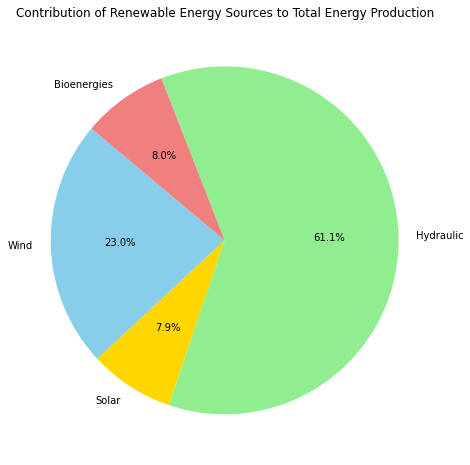

In [8]:
renewables_cols = ['Wind', 'Solar', 'Hydraulic', 'Bioenergies']

# Create a DataFrame for renewables
renewables_df = df[renewables_cols].sum()

# Plotting a pie chart for renewables contribution
plt.figure(figsize=(8, 8))
plt.pie(renewables_df, labels=renewables_df.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'gold', 'lightgreen', 'lightcoral'])
plt.title('Contribution of Renewable Energy Sources to Total Energy Production')
plt.show()

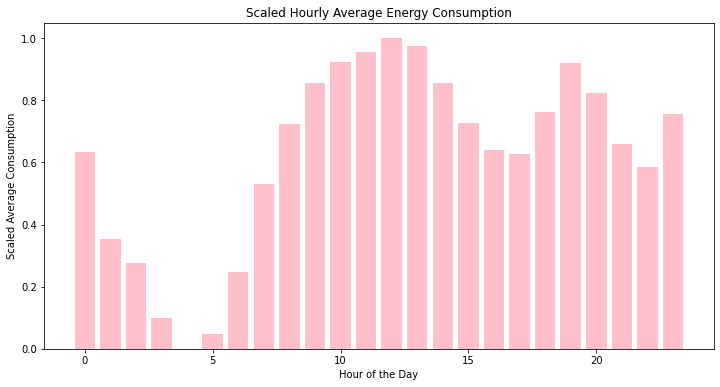

In [9]:
hourly_avg_consumption = df.groupby(df['Date'].dt.hour)['Consommation'].mean().reset_index()

# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(hourly_avg_consumption[['Consommation']])

# Plotting the scaled hourly average consumption
plt.figure(figsize=(12, 6))
plt.bar(hourly_avg_consumption['Date'], scaled_data[:, 0], color='pink')
plt.xlabel('Hour of the Day')
plt.ylabel('Scaled Average Consumption')
plt.title('Scaled Hourly Average Energy Consumption')
plt.show()

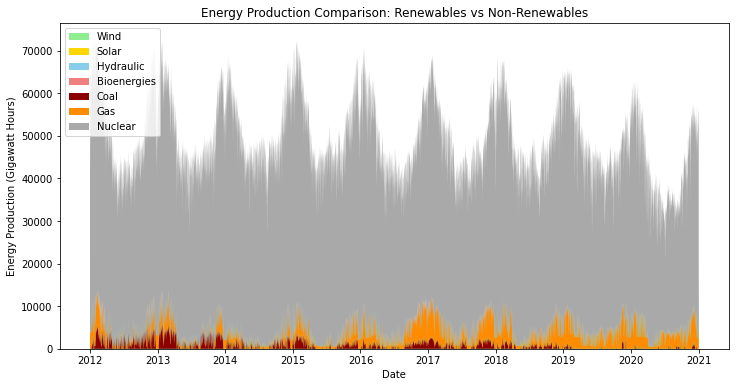

In [10]:
plt.figure(figsize=(12, 6))

plt.stackplot(df['Date'], df[renewables_cols].T, labels=renewables_cols, colors=['lightgreen', 'gold', 'skyblue', 'lightcoral'])
plt.stackplot(df['Date'], df[non_renewables_cols].T, labels=non_renewables_cols, colors=['darkred', 'darkorange', 'darkgray'])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Energy Production (Gigawatt Hours)')
plt.title('Energy Production Comparison: Renewables vs Non-Renewables')
plt.legend(loc='upper left')

plt.show()

/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_98233/3287623573.py:7: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date', 'Heures'], dtype='object')
  df_rolling = df.rolling(window=rolling_window).mean()


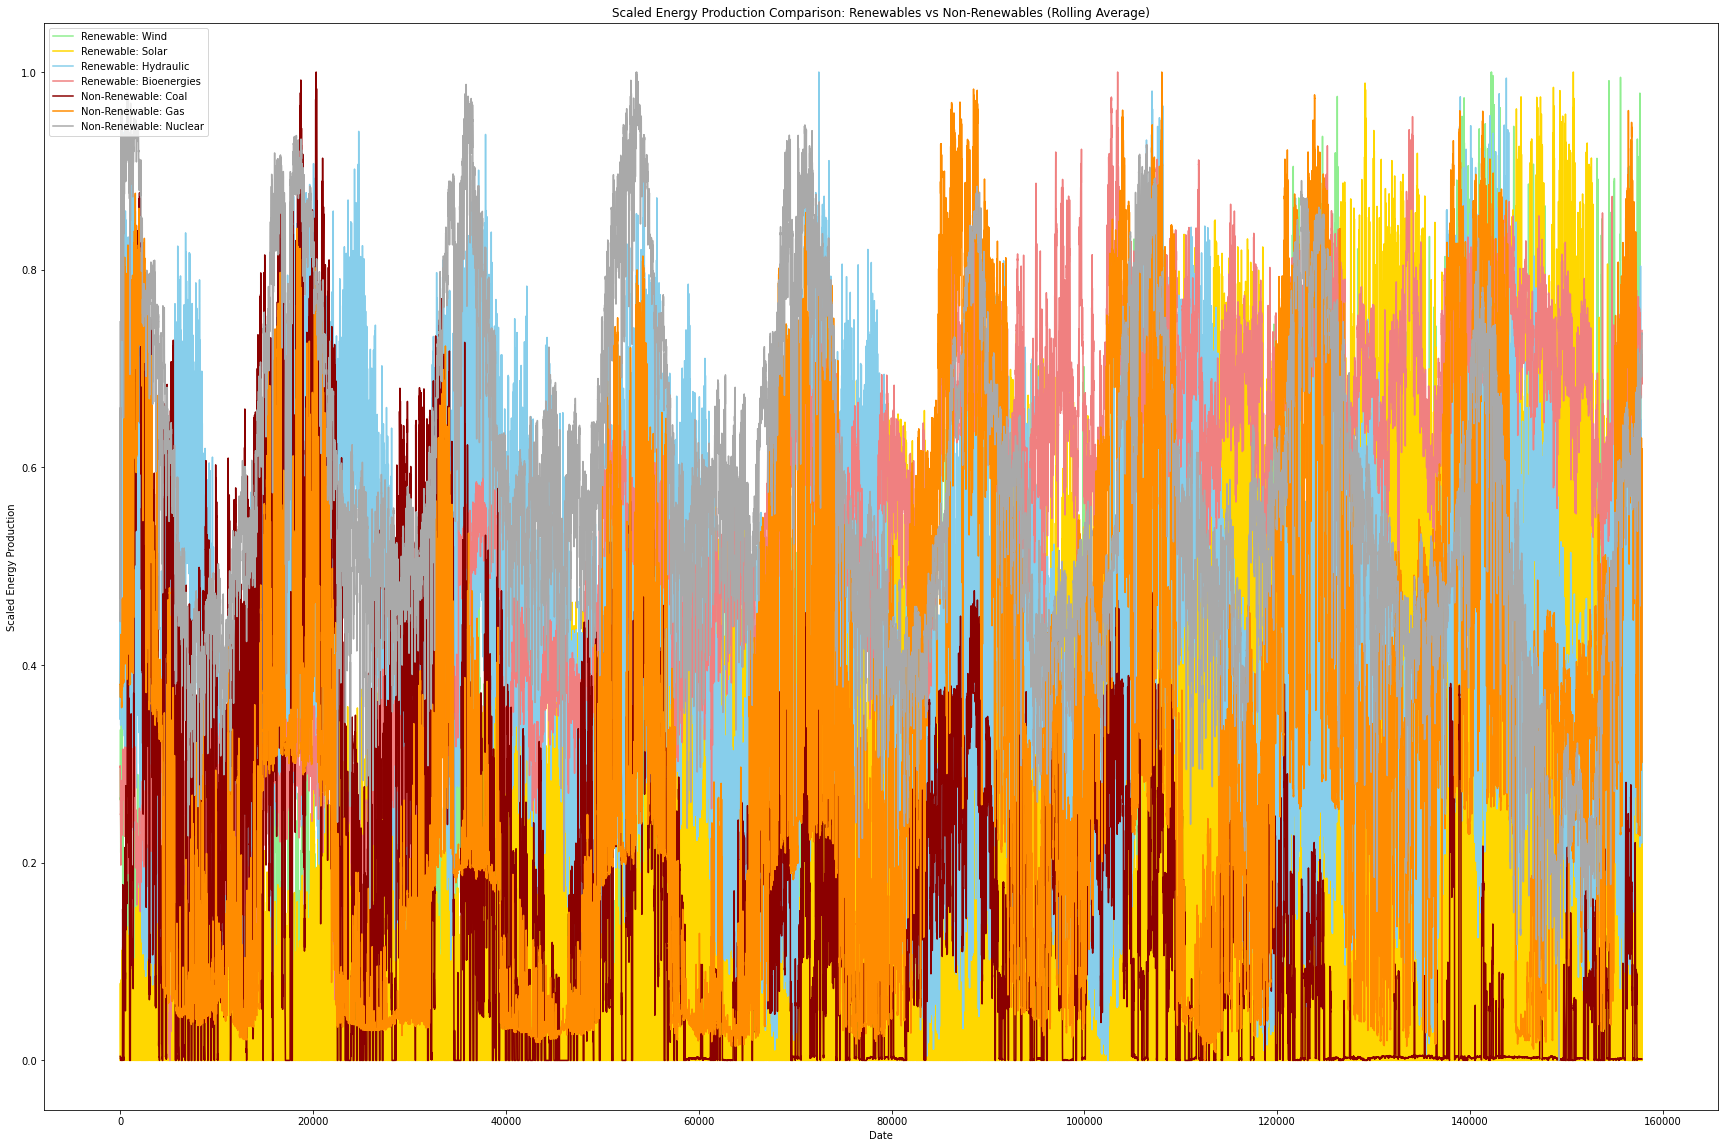

In [11]:
scaler = MinMaxScaler()
scaled_renewables = scaler.fit_transform(df[renewables_cols])
scaled_non_renewables = scaler.fit_transform(df[non_renewables_cols])

# Calculate rolling average for a smoother plot
rolling_window = 7  # You can adjust the window size as needed
df_rolling = df.rolling(window=rolling_window).mean()

# Scaling the rolling average data
scaler_rolling = MinMaxScaler()
scaled_renewables_rolling = scaler_rolling.fit_transform(df_rolling[renewables_cols])
scaled_non_renewables_rolling = scaler_rolling.fit_transform(df_rolling[non_renewables_cols])

# Plotting smoothed line chart for scaled energy sources over time
plt.figure(figsize=(30, 20))

for i, col in enumerate(renewables_cols):
    plt.plot(df_rolling.index, scaled_renewables_rolling[:, i], label=f'Renewable: {col}', color=['lightgreen', 'gold', 'skyblue', 'lightcoral'][i])

for i, col in enumerate(non_renewables_cols):
    plt.plot(df_rolling.index, scaled_non_renewables_rolling[:, i], label=f'Non-Renewable: {col}', color=['darkred', 'darkorange', 'darkgray'][i])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Scaled Energy Production')
plt.title('Scaled Energy Production Comparison: Renewables vs Non-Renewables (Rolling Average)')
plt.legend(loc='upper left')

plt.show()

In [12]:
df

,Date,Heures,Consommation,Fuel,Coal,Gas,Nuclear,Wind,Solar,Hydraulic,Pumping,Bioenergies,Total_Renewables,Total_Non_Renewables,Renewables_Contribution,Non-Renewables_Contribution,Renewables_Growth_Rate,Non_Renewables_Growth_Rate
0,2012-01-01 00:00:00,00:00,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,12229.0,56538.0,20.970591,96.952757,NaN,NaN
1,2012-01-01 00:30:00,00:30,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,12229.0,56538.0,20.970591,96.952757,0.000000,0.000000
2,2012-01-01 01:00:00,01:00,56231.0,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,-1730.0,721.0,11855.0,55606.0,21.082677,98.888513,-3.058304,-1.648449
3,2012-01-01 01:30:00,01:30,56075.0,491.0,25.0,3832.0,51950.0,3526.0,0.0,7299.0,-2134.0,722.0,11547.0,55807.0,20.592064,99.522069,-2.598060,0.361472
4,2012-01-01 02:00:00,02:00,55532.0,492.0,25.0,3839.0,51625.0,3535.0,0.0,7159.0,-2449.0,719.0,11413.0,55489.0,20.552114,99.922567,-1.160475,-0.569821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157826,2020-12-31 21:30:00,21:30,64423.0,94.0,8.0,5712.0,50680.0,1319.0,0.0,7755.0,-228.0,1120.0,10194.0,56400.0,15.823541,87.546373,-5.066120,-0.639501
157827,2020-12-31 22:00:00,22:00,63505.0,93.0,8.0,5583.0,50726.0,1246.0,0.0,7146.0,-230.0,1117.0,9509.0,56317.0,14.973624,88.681206,-6.719639,-0.147163
157828,2020-12-31 22:30:00,22:30,64331.0,93.0,8.0,5573.0,50719.0,1210.0,0.0,7136.0,-175.0,1121.0,9467.0,56300.0,14.716078,87.516128,-0.441687,-0.030186
157829,2020-12-31 23:00:00,23:00,66853.0,94.0,8.0,5731.0,50679.0,1129.0,0.0,8148.0,-175.0,1124.0,10401.0,56418.0,15.558015,84.391127,9.865850,0.209591


In [21]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

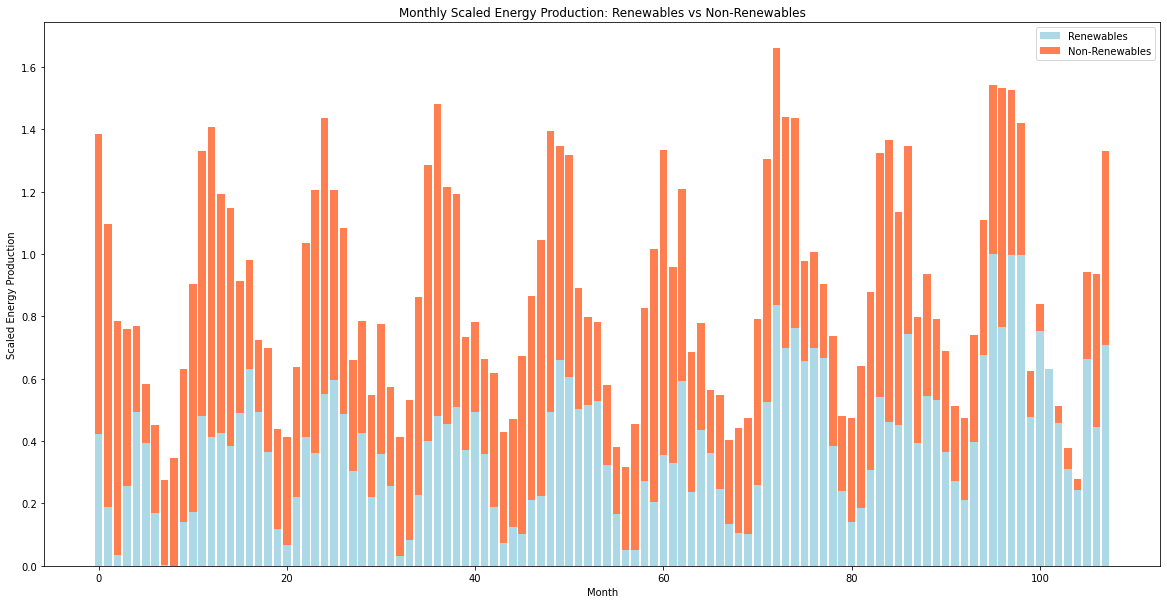

In [22]:
monthly_data = df.groupby(['Year', 'Month'])[['Total_Renewables', 'Total_Non_Renewables']].sum()

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(monthly_data)

# Resetting the index to convert MultiIndex to a regular index
monthly_data_reset = monthly_data.reset_index()

# Plotting the scaled monthly data
plt.figure(figsize=(20, 10))

# Bar plot for renewables and non-renewables
plt.bar(monthly_data_reset.index, scaled_data[:, 0], label='Renewables', color='lightblue')
plt.bar(monthly_data_reset.index, scaled_data[:, 1], bottom=scaled_data[:, 0], label='Non-Renewables', color='coral')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Scaled Energy Production')
plt.title('Monthly Scaled Energy Production: Renewables vs Non-Renewables')
plt.legend()

plt.show()

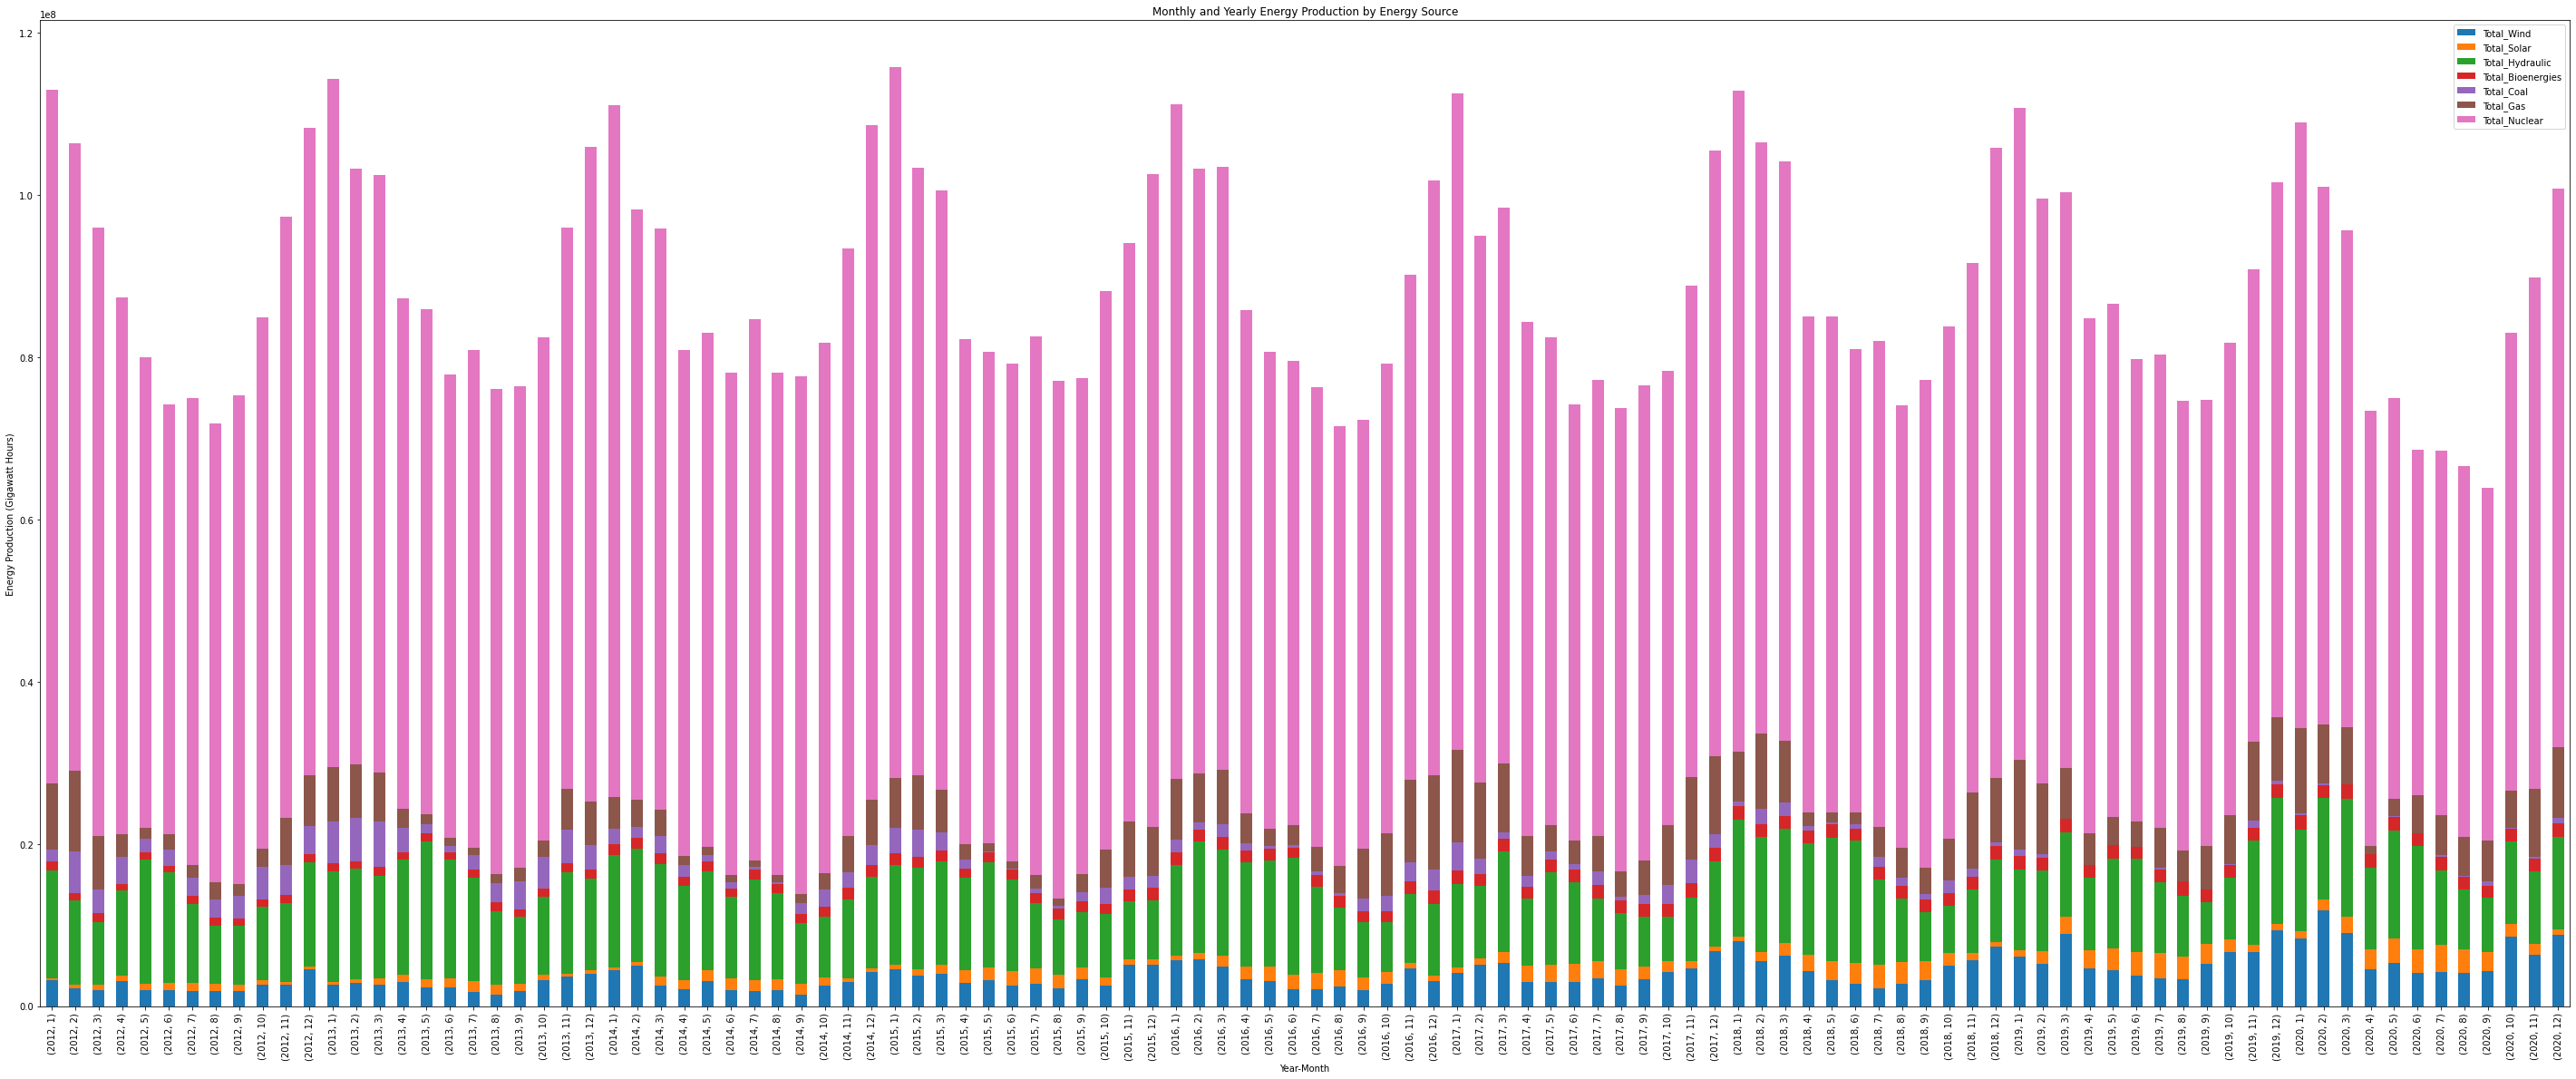

In [23]:
energy_sources = ['Wind', 'Solar', 'Hydraulic', 'Bioenergies', 'Coal', 'Gas', 'Nuclear']

for source in energy_sources:
    df[f'Total_{source}'] = df[source]


monthly_yearly_data = df.groupby(['Year', 'Month']).sum()

fig, ax = plt.subplots(figsize=(50, 20))

monthly_yearly_data[[f'Total_{source}' for source in energy_sources]].plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Year-Month')
plt.ylabel('Energy Production (Gigawatt Hours)')
plt.title('Monthly and Yearly Energy Production by Energy Source')

plt.show()

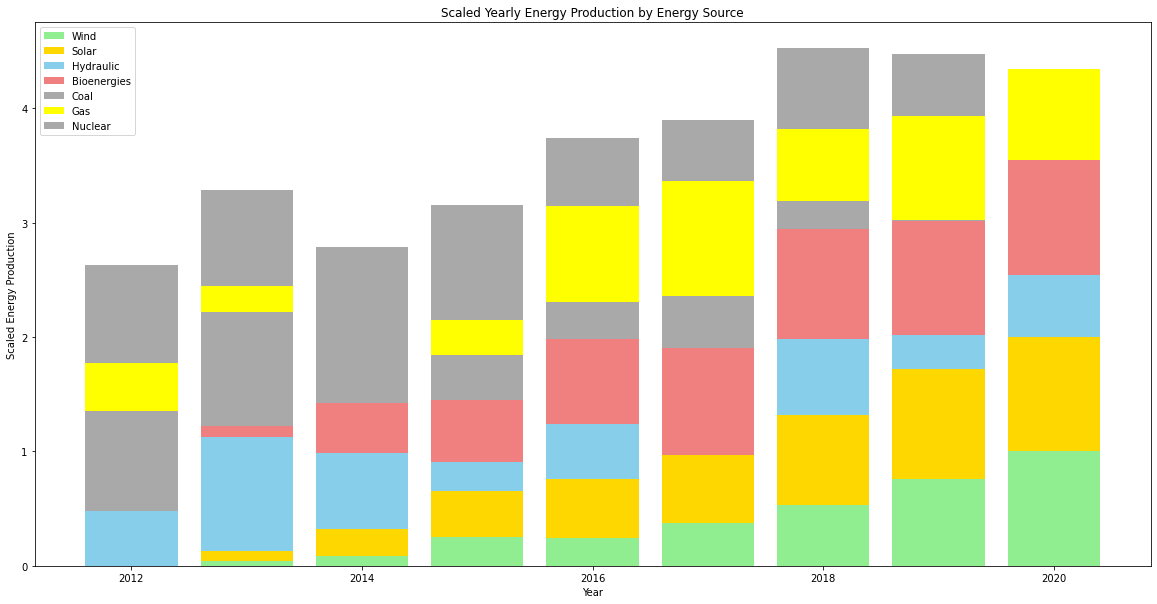

In [73]:
yearly_data = df.groupby('Year').sum()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(yearly_data[[f'Total_{source}' for source in energy_sources]])

plt.figure(figsize=(20, 10))


plt.bar(yearly_data.index, scaled_data[:, 0], label='Wind', color='lightgreen')
plt.bar(yearly_data.index, scaled_data[:, 1], bottom=scaled_data[:, 0], label='Solar', color='gold')
plt.bar(yearly_data.index, scaled_data[:, 2], bottom=scaled_data[:, 0] + scaled_data[:, 1], label='Hydraulic', color='skyblue')
plt.bar(yearly_data.index, scaled_data[:, 3], bottom=scaled_data[:, 0] + scaled_data[:, 1] + scaled_data[:, 2], label='Bioenergies', color='lightcoral')
plt.bar(yearly_data.index, scaled_data[:, 4], bottom=scaled_data[:, 0] + scaled_data[:, 1] + scaled_data[:, 2] + scaled_data[:, 3], label='Coal', color='darkgrey')
plt.bar(yearly_data.index, scaled_data[:, 5], bottom=scaled_data[:, 0] + scaled_data[:, 1] + scaled_data[:, 2] + scaled_data[:, 3] + scaled_data[:, 4], label='Gas', color='yellow')
plt.bar(yearly_data.index, scaled_data[:, 6], bottom=scaled_data[:, 0] + scaled_data[:, 1] + scaled_data[:, 2] + scaled_data[:, 3] + scaled_data[:, 4] + scaled_data[:, 5], label='Nuclear', color='darkgray')


plt.xlabel('Year')
plt.ylabel('Scaled Energy Production')
plt.title('Scaled Yearly Energy Production by Energy Source')
plt.legend()

plt.savefig("distribution_energy.png", format='png')

plt.show()

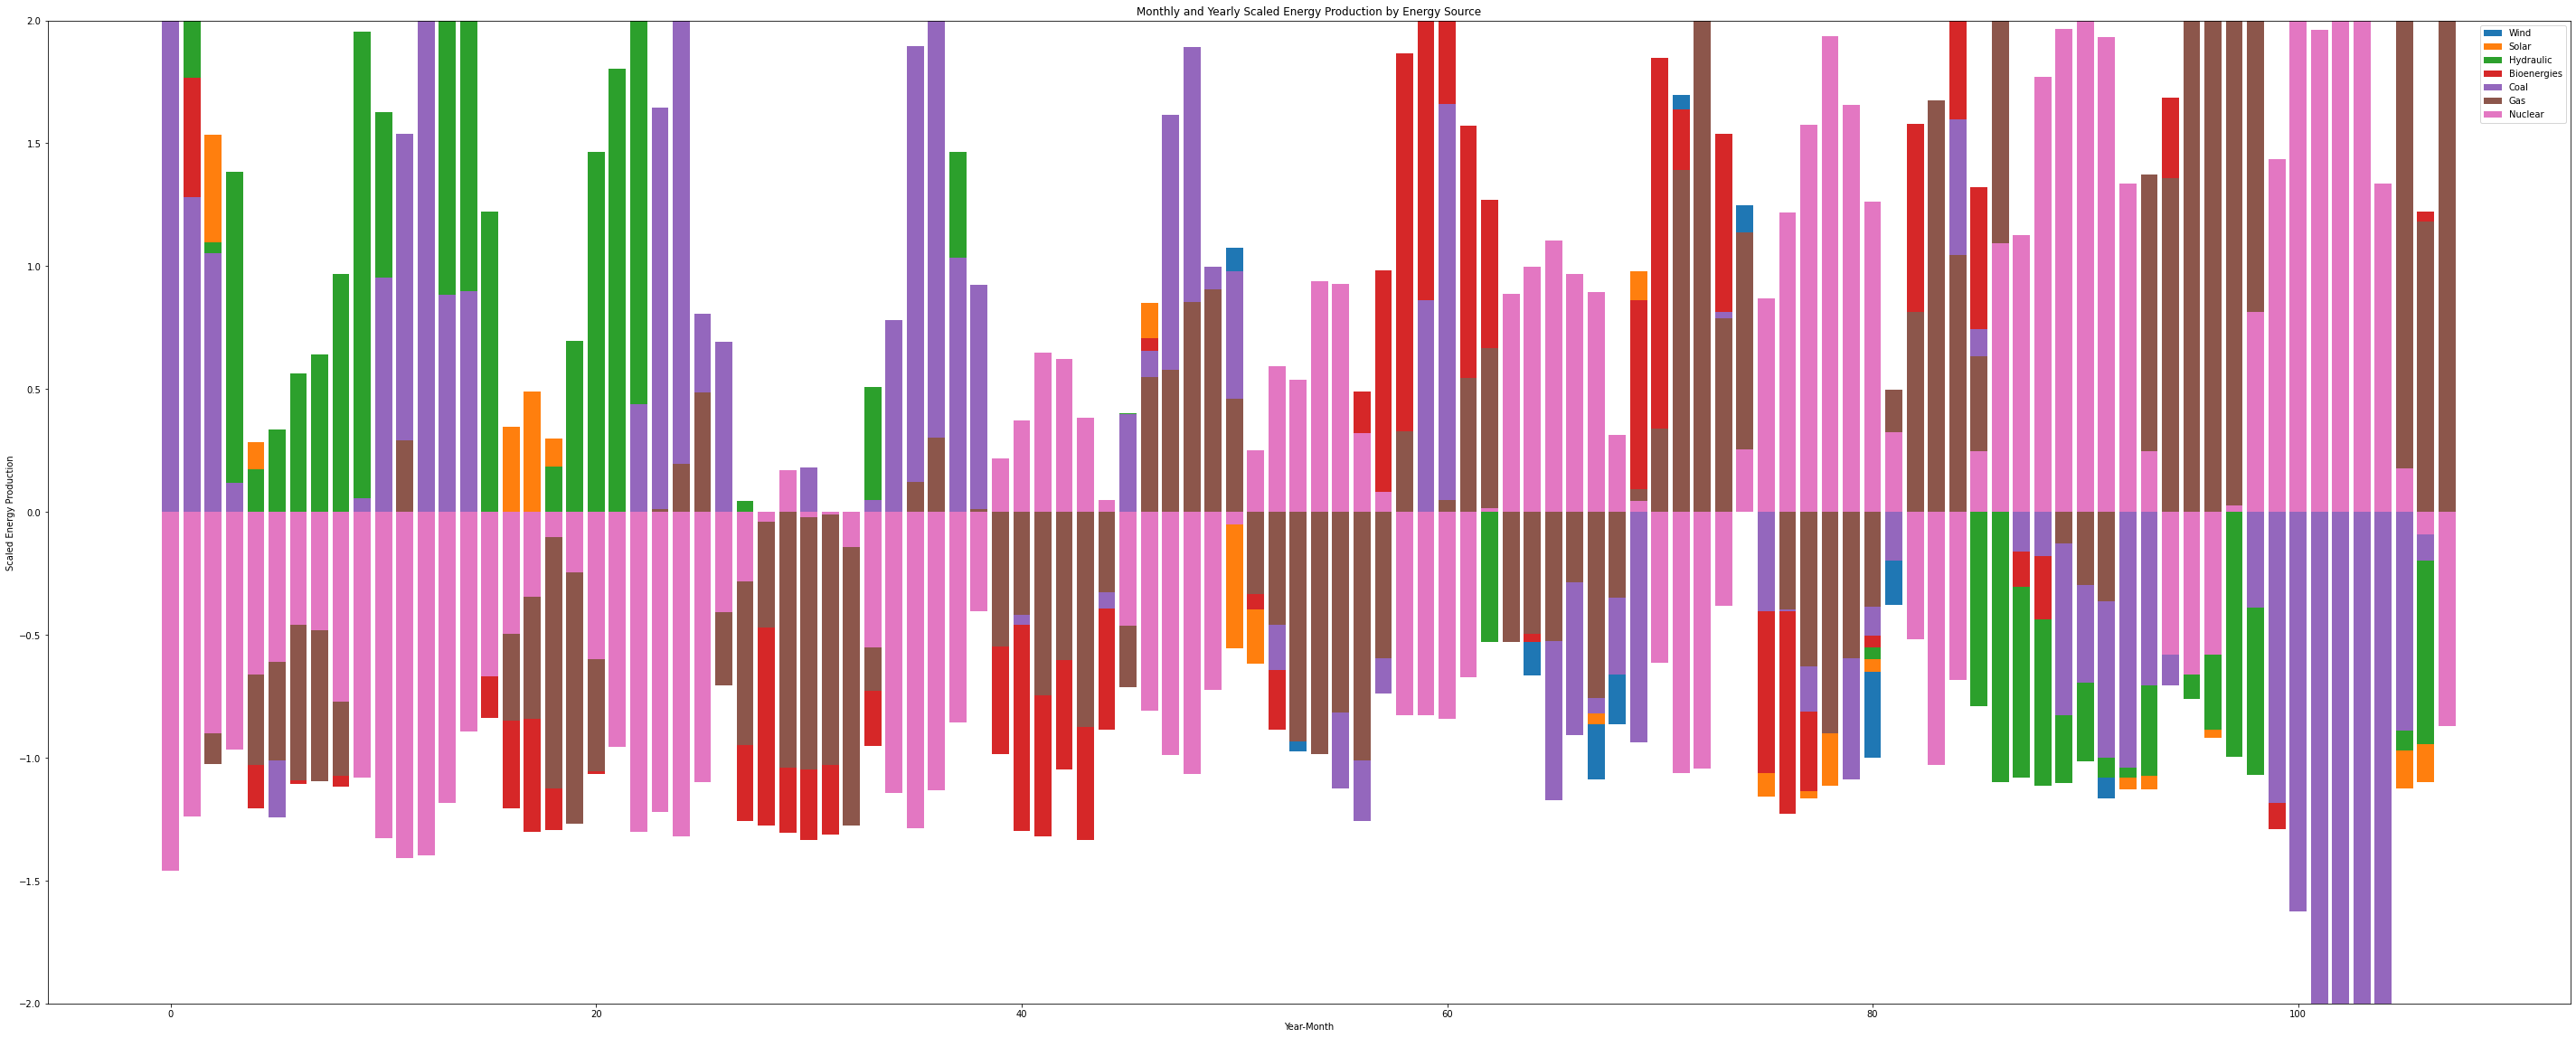

In [25]:
energy_sources = ['Wind', 'Solar', 'Hydraulic', 'Bioenergies', 'Coal', 'Gas', 'Nuclear']

for source in energy_sources:
    df[f'Total_{source}'] = df[source]

monthly_yearly_data = df.groupby(['Year', 'Month']).sum()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(monthly_yearly_data)

monthly_yearly_data_numeric_index = monthly_yearly_data.reset_index()

fig, ax = plt.subplots(figsize=(50, 20))

for i, source in enumerate(energy_sources):
    ax.bar(monthly_yearly_data_numeric_index.index, scaled_data[:, i], label=source)

ax.set_ylim(-2, 2)

plt.xlabel('Year-Month')
plt.ylabel('Scaled Energy Production')
plt.title('Monthly and Yearly Scaled Energy Production by Energy Source')
plt.legend()

plt.show()

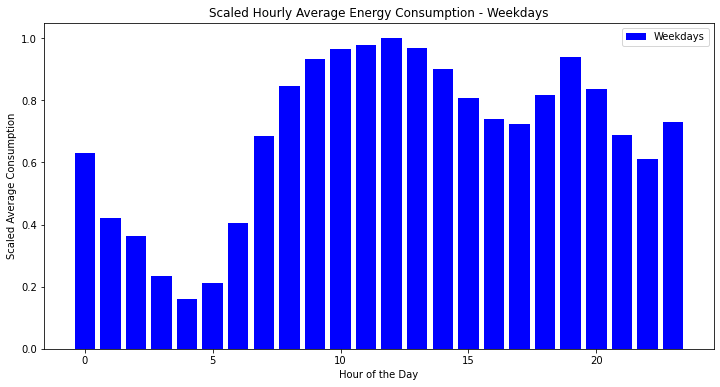

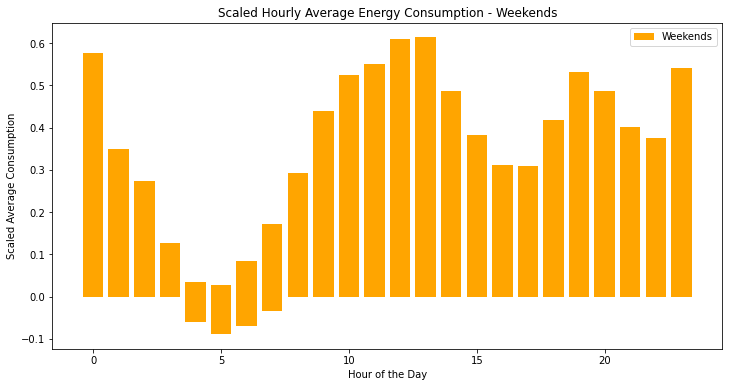

In [27]:
df['DayOfWeek'] = df['Date'].dt.dayofweek

hourly_avg_consumption = df.groupby(['DayOfWeek', df['Date'].dt.hour])['Consommation'].mean().reset_index()

weekdays_data = hourly_avg_consumption[hourly_avg_consumption['DayOfWeek'] < 5]
weekends_data = hourly_avg_consumption[hourly_avg_consumption['DayOfWeek'] >= 5]

scaler = MinMaxScaler()
scaled_weekdays_data = scaler.fit_transform(weekdays_data[['Consommation']])

scaled_weekends_data = scaler.transform(weekends_data[['Consommation']])

plt.figure(figsize=(12, 6))
plt.bar(weekdays_data['Date'], scaled_weekdays_data[:, 0], color='blue', label='Weekdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Scaled Average Consumption')
plt.title('Scaled Hourly Average Energy Consumption - Weekdays')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(weekends_data['Date'], scaled_weekends_data[:, 0], color='orange', label='Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Scaled Average Consumption')
plt.title('Scaled Hourly Average Energy Consumption - Weekends')
plt.legend()
plt.show()

In [28]:
df

,Date,Heures,Consommation,Fuel,Coal,Gas,Nuclear,Wind,Solar,Hydraulic,...,Total_Wind,Total_Solar,Total_Hydraulic,Total_Bioenergies,Total_Coal,Total_Gas,Total_Nuclear,DayOfWeek,Month,Year
0,2012-01-01 00:00:00,00:00,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,...,3588.0,0.0,7922.0,719.0,25.0,3816.0,52697.0,6,1,2012
1,2012-01-01 00:30:00,00:30,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,...,3588.0,0.0,7922.0,719.0,25.0,3816.0,52697.0,6,1,2012
2,2012-01-01 01:00:00,01:00,56231.0,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,...,3536.0,0.0,7598.0,721.0,25.0,3834.0,51747.0,6,1,2012
3,2012-01-01 01:30:00,01:30,56075.0,491.0,25.0,3832.0,51950.0,3526.0,0.0,7299.0,...,3526.0,0.0,7299.0,722.0,25.0,3832.0,51950.0,6,1,2012
4,2012-01-01 02:00:00,02:00,55532.0,492.0,25.0,3839.0,51625.0,3535.0,0.0,7159.0,...,3535.0,0.0,7159.0,719.0,25.0,3839.0,51625.0,6,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157826,2020-12-31 21:30:00,21:30,64423.0,94.0,8.0,5712.0,50680.0,1319.0,0.0,7755.0,...,1319.0,0.0,7755.0,1120.0,8.0,5712.0,50680.0,3,12,2020
157827,2020-12-31 22:00:00,22:00,63505.0,93.0,8.0,5583.0,50726.0,1246.0,0.0,7146.0,...,1246.0,0.0,7146.0,1117.0,8.0,5583.0,50726.0,3,12,2020
157828,2020-12-31 22:30:00,22:30,64331.0,93.0,8.0,5573.0,50719.0,1210.0,0.0,7136.0,...,1210.0,0.0,7136.0,1121.0,8.0,5573.0,50719.0,3,12,2020
157829,2020-12-31 23:00:00,23:00,66853.0,94.0,8.0,5731.0,50679.0,1129.0,0.0,8148.0,...,1129.0,0.0,8148.0,1124.0,8.0,5731.0,50679.0,3,12,2020


First Saturdays 2016:
 Date
1    2016-01-02
2    2016-02-06
3    2016-03-05
4    2016-04-02
5    2016-05-07
6    2016-06-04
7    2016-07-02
8    2016-08-06
9    2016-09-03
10   2016-10-01
11   2016-11-05
12   2016-12-03
Name: Date, dtype: datetime64[ns]
First Wednesdays 2016:
 Date
1    2016-01-06
2    2016-02-03
3    2016-03-02
4    2016-04-06
5    2016-05-04
6    2016-06-01
7    2016-07-06
8    2016-08-03
9    2016-09-07
10   2016-10-05
11   2016-11-02
12   2016-12-07
Name: Date, dtype: datetime64[ns]
First Saturdays Data:
             Date Heures  Consommation   Fuel    Coal     Gas  Nuclear    Wind  \
70180 2016-01-02  00:00       57349.0  158.0    18.0  2243.0  51739.0  5899.0   
71860 2016-02-06  00:00       64096.0  161.0   329.0  2938.0  55495.0  4524.0   
73204 2016-03-05  00:00       67503.0  156.0  1048.0  4696.0  53225.0  1495.0   
74548 2016-04-02  00:00       61331.0  134.0  1105.0  4222.0  45319.0  1040.0   
76228 2016-05-07  00:00       47318.0  149.0    19.0   518.0  4

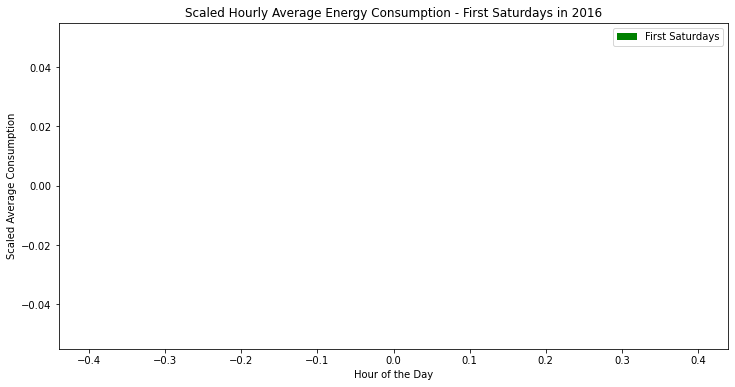

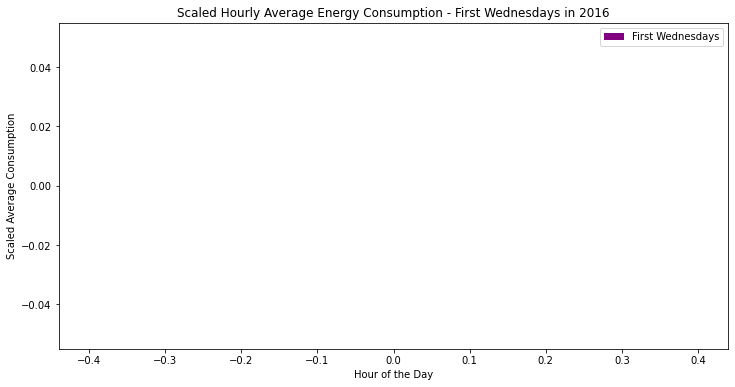

In [37]:
df_2016 = df[df['Date'].dt.year == 2016]

# Find the first Saturday and first Wednesday of each month in 2016
first_saturdays_2016 = df_2016[df_2016['Date'].dt.weekday == 5].groupby(df_2016['Date'].dt.month)['Date'].first()
first_wednesdays_2016 = df_2016[df_2016['Date'].dt.weekday == 2].groupby(df_2016['Date'].dt.month)['Date'].first()

print("First Saturdays 2016:\n", first_saturdays_2016)
print("First Wednesdays 2016:\n", first_wednesdays_2016)

# Extract hourly consumption for the first Saturdays and first Wednesdays
first_saturdays_data = df_2016[df_2016['Date'].isin(first_saturdays_2016)]
first_wednesdays_data = df_2016[df_2016['Date'].isin(first_wednesdays_2016)]

print("First Saturdays Data:\n", first_saturdays_data)
print("First Wednesdays Data:\n", first_wednesdays_data)

# Group by hour and calculate the mean consumption
first_saturdays_hourly_avg = first_saturdays_data.groupby(df_2016['Date'].dt.hour)['Consommation'].mean().reset_index()
first_wednesdays_hourly_avg = first_wednesdays_data.groupby(df_2016['Date'].dt.hour)['Consommation'].mean().reset_index()

print("First Saturdays Hourly Avg:\n", first_saturdays_hourly_avg)
print("First Wednesdays Hourly Avg:\n", first_wednesdays_hourly_avg)

# Scaling the data
scaler = MinMaxScaler()
scaled_saturdays_data = scaler.fit_transform(first_saturdays_hourly_avg[['Consommation']])
scaled_wednesdays_data = scaler.fit_transform(first_wednesdays_hourly_avg[['Consommation']])

# Plotting the scaled hourly average consumption for first Saturdays in 2016
plt.figure(figsize=(12, 6))
plt.bar(first_saturdays_hourly_avg['Date'], scaled_saturdays_data[:, 0], color='green', label='First Saturdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Scaled Average Consumption')
plt.title('Scaled Hourly Average Energy Consumption - First Saturdays in 2016')
plt.legend()
plt.show()

# Plotting the scaled hourly average consumption for first Wednesdays in 2016
plt.figure(figsize=(12, 6))
plt.bar(first_wednesdays_hourly_avg['Date'], scaled_wednesdays_data[:, 0], color='purple', label='First Wednesdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Scaled Average Consumption')
plt.title('Scaled Hourly Average Energy Consumption - First Wednesdays in 2016')
plt.legend()
plt.show()

In [36]:
df_2016

,Date,Heures,Consommation,Fuel,Coal,Gas,Nuclear,Wind,Solar,Hydraulic,...,Total_Wind,Total_Solar,Total_Hydraulic,Total_Bioenergies,Total_Coal,Total_Gas,Total_Nuclear,DayOfWeek,Month,Year
70131,2016-01-01 00:00:00,00:00,60165.0,296.0,21.0,2226.0,54383.0,2618.0,0.0,3594.0,...,2618.0,0.0,3594.0,1052.0,21.0,2226.0,54383.0,4,1,2016
70132,2016-01-01 00:00:00,00:00,60165.0,296.0,21.0,2226.0,54383.0,2618.0,0.0,3594.0,...,2618.0,0.0,3594.0,1052.0,21.0,2226.0,54383.0,4,1,2016
70133,2016-01-01 00:30:00,00:30,58887.0,161.0,22.0,2227.0,54363.0,2478.0,0.0,3470.0,...,2478.0,0.0,3470.0,1086.0,22.0,2227.0,54363.0,4,1,2016
70134,2016-01-01 01:00:00,01:00,56678.0,160.0,22.0,2205.0,53715.0,2199.0,0.0,2516.0,...,2199.0,0.0,2516.0,1091.0,22.0,2205.0,53715.0,4,1,2016
70135,2016-01-01 01:30:00,01:30,56460.0,160.0,23.0,2212.0,54092.0,1966.0,0.0,2849.0,...,1966.0,0.0,2849.0,1082.0,23.0,2212.0,54092.0,4,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87695,2016-12-31 21:30:00,21:30,71318.0,164.0,1604.0,7655.0,53335.0,164.0,0.0,5666.0,...,164.0,0.0,5666.0,1085.0,1604.0,7655.0,53335.0,5,12,2016
87696,2016-12-31 22:00:00,22:00,70793.0,168.0,1541.0,7577.0,53286.0,185.0,0.0,5179.0,...,185.0,0.0,5179.0,1086.0,1541.0,7577.0,53286.0,5,12,2016
87697,2016-12-31 22:30:00,22:30,71924.0,164.0,1410.0,7557.0,53186.0,184.0,0.0,5137.0,...,184.0,0.0,5137.0,1092.0,1410.0,7557.0,53186.0,5,12,2016
87698,2016-12-31 23:00:00,23:00,75424.0,165.0,1588.0,7667.0,53310.0,208.0,0.0,7180.0,...,208.0,0.0,7180.0,1095.0,1588.0,7667.0,53310.0,5,12,2016


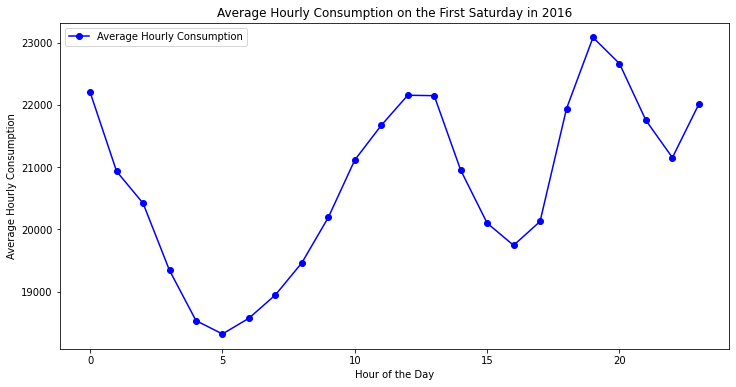

In [42]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the first Saturday in 2016
first_saturday_2016_data = df[(df['DayOfWeek'] == 6) & (df['Year'] == 2016) & (df['Month'] == 1)]

# Calculate half-hourly consumption
half_hourly_consumption = first_saturday_2016_data[['Date', 'Consommation']]

# Aggregate to hourly consumption
hourly_consumption = half_hourly_consumption.resample('H', on='Date').sum().reset_index()

# Calculate average hourly consumption
average_hourly_consumption = hourly_consumption.groupby(hourly_consumption['Date'].dt.hour)['Consommation'].mean().reset_index()

# Plot average hourly consumption
plt.figure(figsize=(12, 6))
plt.plot(average_hourly_consumption['Date'], average_hourly_consumption['Consommation'], marker='o', linestyle='-', color='blue', label='Average Hourly Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Hourly Consumption')
plt.title('Average Hourly Consumption on the First Saturday in 2016')
plt.legend()
plt.show()

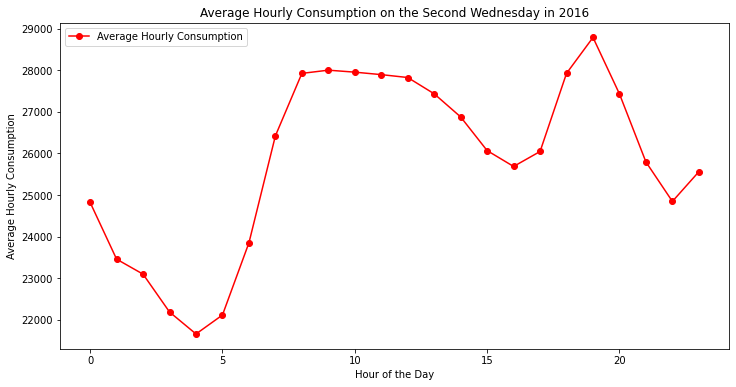

In [44]:
second_wednesday_2016_data = df[(df['DayOfWeek'] == 2) & (df['Year'] == 2016) & (df['Month'] == 1)]

# Calculate half-hourly consumption
half_hourly_consumption_wed = second_wednesday_2016_data[['Date', 'Consommation']]

# Aggregate to hourly consumption
hourly_consumption_wed = half_hourly_consumption.resample('H', on='Date').sum().reset_index()

# Calculate average hourly consumption
average_hourly_consumption_wed = hourly_consumption.groupby(hourly_consumption['Date'].dt.hour)['Consommation'].mean().reset_index()

# Plot average hourly consumption
plt.figure(figsize=(12, 6))
plt.plot(average_hourly_consumption['Date'], average_hourly_consumption['Consommation'], marker='o', linestyle='-', color='red', label='Average Hourly Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Hourly Consumption')
plt.title('Average Hourly Consumption on the Second Wednesday in 2016')
plt.legend()
plt.show()

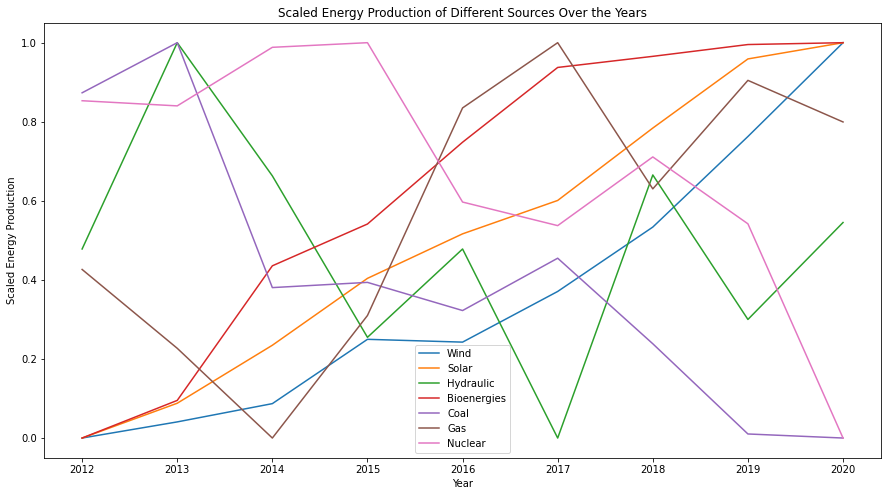

In [46]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(yearly_data[[f'Total_{source}' for source in energy_sources]])

plt.figure(figsize=(15, 8))
for i, source in enumerate(energy_sources):
    plt.plot(yearly_data.index, scaled_data[:, i], label=source)

plt.xlabel('Year')
plt.ylabel('Scaled Energy Production')
plt.title('Scaled Energy Production of Different Sources Over the Years')
plt.legend()
plt.show()

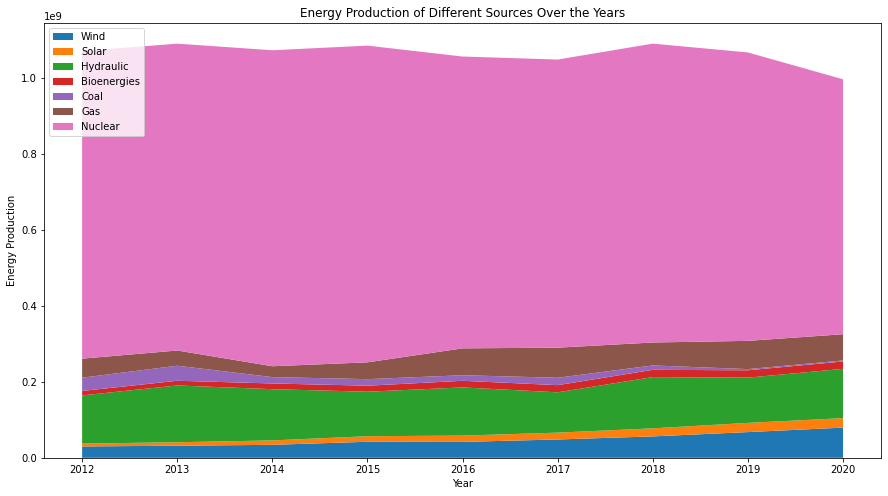

In [47]:
plt.figure(figsize=(15, 8))
plt.stackplot(yearly_data.index, [yearly_data[f'Total_{source}'] for source in energy_sources], labels=energy_sources)

plt.xlabel('Year')
plt.ylabel('Energy Production')
plt.title('Energy Production of Different Sources Over the Years')
plt.legend(loc='upper left')

plt.show()

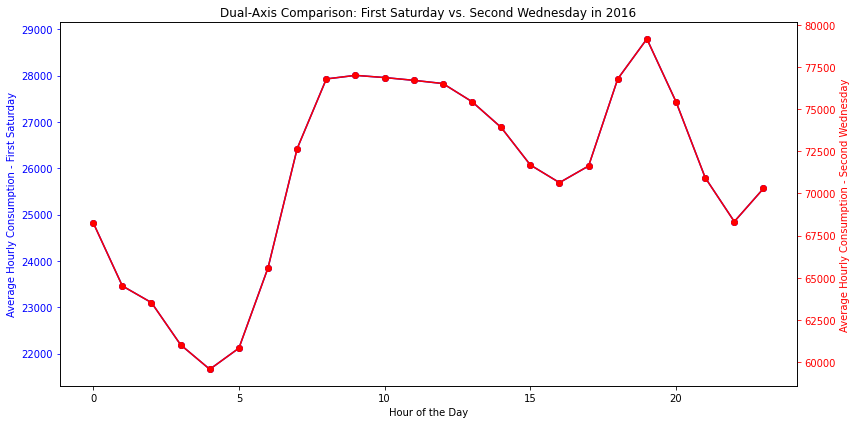

In [72]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(average_hourly_consumption['Date'], average_hourly_consumption['Consommation'], marker='o', linestyle='-', color='blue', label='First Saturday 2016')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Hourly Consumption - First Saturday', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(average_hourly_consumption_wed['Date'], average_hourly_consumption_wed['Consommation'], marker='o', linestyle='-', color='red', label='Second Wednesday 2016')
ax2.set_ylabel('Average Hourly Consumption - Second Wednesday', color='red')
ax2.tick_params('y', colors='red')

plt.title('Dual-Axis Comparison: First Saturday vs. Second Wednesday in 2016')
fig.tight_layout()

plt.savefig("sat-vs-wed.png", format='png')

plt.show()
#plt.savefig("sat-vs-wed.pdf", format='pdf')

IndexError: index 8 is out of bounds for axis 0 with size 8

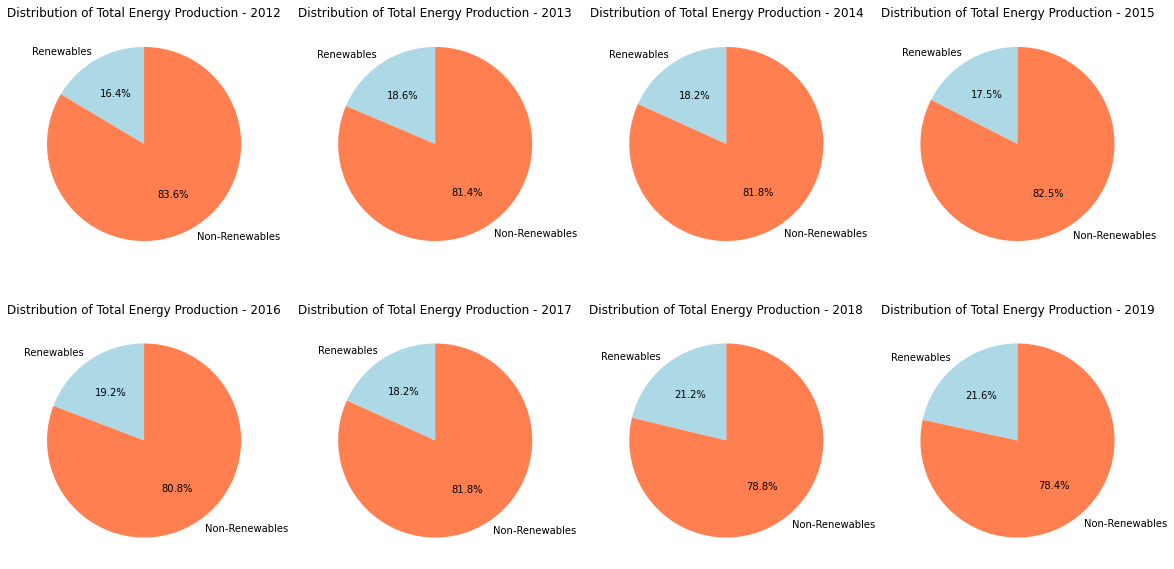

In [81]:
df['Date'] = pd.to_datetime(df['Date'])
yearly_data = df.groupby(df['Date'].dt.year)[['Total_Renewables', 'Total_Non_Renewables']].sum()


num_years = len(yearly_data)

# Set up subplots in two rows
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharey=True)

# Flatten the 2D array of subplots to access them easily
axs = axs.flatten()

for i, year in enumerate(yearly_data.index):
    axs[i].pie(yearly_data.loc[year], labels=['Renewables', 'Non-Renewables'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'coral'])
    axs[i].set_title(f'Distribution of Total Energy Production - {year}')

for j in range(num_years, len(axs)):
    axs[j].axis('off')

plt.tight_layout()


plt.savefig("comparison_final.png", format='png')
plt.show()

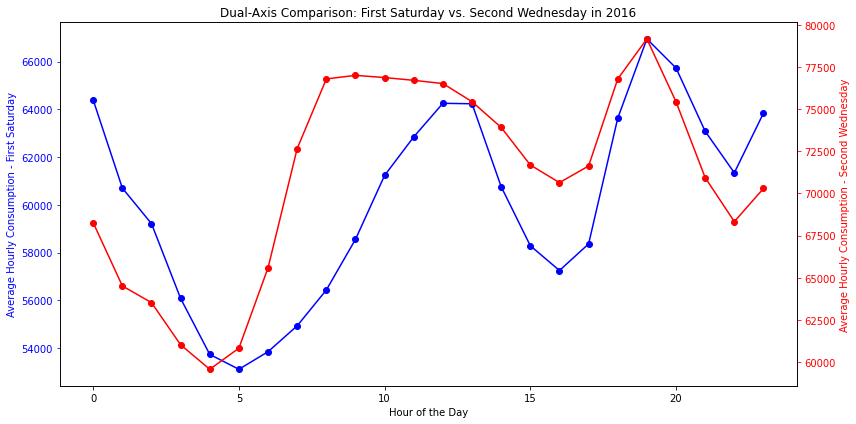

In [75]:
average_hourly_consumption_sat = first_saturday_2016_data.groupby(first_saturday_2016_data['Date'].dt.hour)['Consommation'].mean().reset_index()

average_hourly_consumption_wed = second_wednesday_2016_data.groupby(second_wednesday_2016_data['Date'].dt.hour)['Consommation'].mean().reset_index()

merged_data = pd.merge(average_hourly_consumption_sat, average_hourly_consumption_wed, on='Date', suffixes=('_Sat', '_Wed'))

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(merged_data['Date'], merged_data['Consommation_Sat'], marker='o', linestyle='-', color='blue', label='First Saturday 2016')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Hourly Consumption - First Saturday', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['Consommation_Wed'], marker='o', linestyle='-', color='red', label='Second Wednesday 2016')
ax2.set_ylabel('Average Hourly Consumption - Second Wednesday', color='red')
ax2.tick_params('y', colors='red')

plt.title('Dual-Axis Comparison: First Saturday vs. Second Wednesday in 2016')
fig.tight_layout()


plt.savefig("sat-vs-wed.png", format='png')
plt.show()
